R Workshop 3
=======

June 21, 2017


# Review from Workshop 2

## Factors and Tabulations

Last time we introduced the concept of a **factor** variable and used
the `ChickWeight` data set to introduce the `table` and `xtabs`
functions tabulating them.

In [1]:
cw <- ChickWeight
head(cw)
head(xtabs(weight ~ Time + Diet, cw))

weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


    Diet
Time    1    2    3    4
  0   828  407  408  410
  2   945  494  504  518
  4  1073  598  622  645
  6  1269  754  779  839
  8  1514  917  984 1056
  10 1768 1085 1171 1260

The first parameter to the `xtabs` function is an R *formula*.
R formulas pop up in various commands.  The context of the
command determines the valid syntax of the formula and how to
interpret the formula.  In the context of the `xtabs`
command the formula has the following meaning.

* __RHS__ - the columns to tabulate.  If there is only one
  element on the RHS, the result is a one dimensional vector.
  If there are two elements (like the example above), they
  should be separated by a `+` and will be arranged as a
  table with the first element specifying the rows and the 
  second element the columns.
  
* __LHS__ - (*optional*) If absent, the number of entries is
  tabulated.  This is helpful for determining whether you
  have an equal number of different factors.  If present,
  then the values for all the factors combination are summed.
  

Compare the following.

```
table(cw$Diet)                  # a 1-d table of Diet counts
table(cw$Time)                  # a 1-d table of Time counts
table(cw$Time, cw$Diet)         # a 2-d table of Time x Diet counts
xtabs( ~ Diet, cw)              # a 1-d table of Diet counts
xtabs( ~ Time, cw)              # a 1-d table of Time counts
xtabs( ~ Time + Diet, cw)       # a 2-d table of Time x Diet counts
xtabs(weight ~ Time + Diet, cw) # a 2-d table of Time x Diet sum of weights
```

Factor variables are essential to the *split-apply-combine*
paradigm that we'll delve into later.

## Base Graphics

In the last workshop I described three plotting systems in R at a high level.

1. __Base__ - The name "base" belies its capabilities.
   There are many fancy things you can do with the base
   package.  The base plot does not need to be imported.

2. __Lattice__ - This specialized plotting system is designed to
   present a grid of plots, where each square is a 
   different aspect of the data.
   
3. __ggplot2__ - The Grammar of Graphics is becoming the
   plotting system of choice for many R applications.
   It's not as immediately intuitive as base plot.  But
   its power soon becomes apparent and it's sometimes
   difficult to go back.

I don't recommend learning more than one package at a time.
It's so easy to confuse options between them that you find
it difficult to get far with any of them.  We'll focus
on base plot through the summer and start ggplot in the Fall.

We introduced base graphics through the single variable
plotting functions `stripchart` and `dotchart`.  We ran
out of time before the end of this topic, so let's review
it and finish it up.

For this topic, we've been following Chapter 3 and 4 of
the O'Reilly book
*Graphing Data with R* by John Jay Hilfiger.  We saw the
`stripchart` function was a very basic but quick way to
visualize how a set of numbers is distributed.

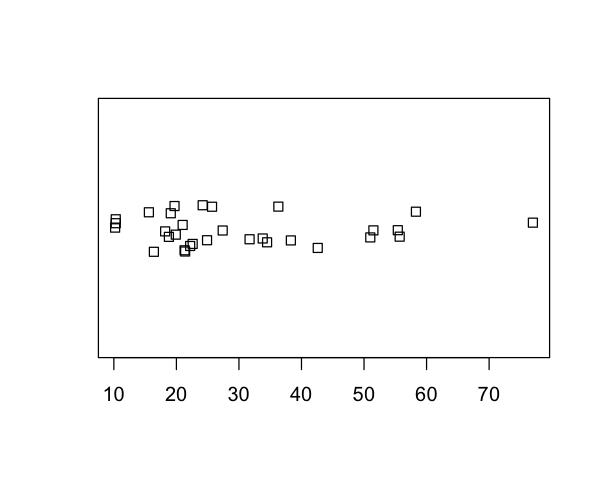

In [2]:
options(repr.plot.width=5, repr.plot.height=4)
stripchart(trees$Volume, method='jitter')

Note how the points are hollow squares.
We can change this default for most plots by 
including the Plot CHaracter argument, pch.
Run `?pch` for a table of *pch* values.

We ran out of time viewing **USArrests**
data with the `dotchart` function.
We had gotten as far as printing labels that didn't
overlap each other.

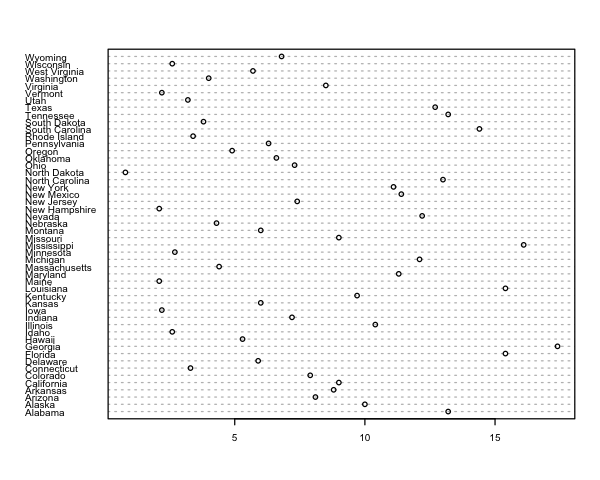

In [3]:
dotchart(USArrests$Murder, labels=row.names(USArrests), cex=.5)

The entries are ordered alphabetically by state.
Let's order them quantitatively.  The `order` function
is used to obtain a list of indices ordered by a set
of criteria.

In [4]:
murder_order <- order(USArrests$Murder)
murder_order[1:10]

[1] 34 19 29 15 45 12 49 23 44  7

We can then re-order the data using these indices.
In the plot below, we added a few more options.

* `main` and `xlab` for labels
* `cex.main` and `cex.lab` to override `cex` for specific cases
* `col` for color

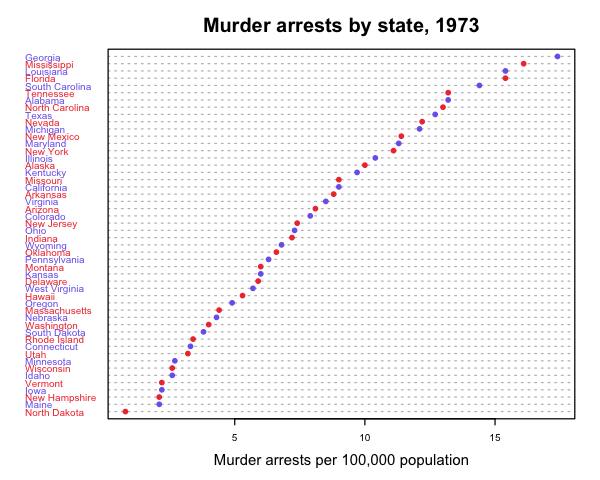

In [5]:
arrests2 <- USArrests[murder_order,]
dotchart(arrests2$Murder, labels=row.names(arrests2), cex=.5,
         main="Murder arrests by state, 1973",
         xlab="Murder arrests per 100,000 population",
         col=c("brown2", "slateblue2"),
         cex.main=2, cex.lab=1.5, pch=19)

The `col` parameter is a recycled vector.  The length of the
parameter must divide the number of rows (in this case 50).
A single color will be repeated 50 times.  A pair of colors
will alternate.  Run `demo(colors)` at your command line and 
pick five colors to place in your `col` vector.

## Math

Last time we introduced the formulas for expectation
and variance for a discrete random variable.  We
derived a short cut for the variance.

$$
\mbox{Var}[X] = E[X^2] - E[X]^2
$$

We derived the expected value for the discrete uniform
distribution and found it was what we intuitively expected.

$$
E[X] = \frac{n+1}{2}
$$

where X is a random variable with equal probability for
integers between 1 and $n$.  The variance was a bit tougher.
We needed a little help from the following trick.

$$
\sum_{k=0}^n k^3 = \sum_{k=0}^n (k+1)^3 - (n+1)^3
$$

By expanding the cubic binomial and canceling out the cubic
terms, we arrived at the well-known sum-of-squares formula.

$$
\sum_{k=1}^n k^2 = \frac{n(n+1)(2n+1)}{6}
$$

This expression can then be used in our variance short cut for
the discrete uniform distribution.

$$
\begin{aligned}
\mbox{Var}[X] &= E[X^2] - E[X]^2 \\
    &= \frac{1}{n}\sum_{i=1}^n i^2 - \left(\frac{n+1}{2} \right)^2 \\
    &= \frac{1}{n}\frac{n(n+1)(2n+1)}{6} - \frac{n^2 + 2n + 1}{4} \\
    &= \frac{2(2n^2 + 2n + n + 1)}{2 \cdot 6} - \frac{3n^2 + 6n + 3}{3 \cdot 4} \\
    &= \frac{4n^2 + 6n + 2 - 3n^2 - 6n - 3}{12} \\
    &= \frac{n^2-1}{12}
\end{aligned}
$$

Let's see if there is anything close to what we get with
random sampling.  In the last workshop, we introduced
the `sample` function.  Let's genenerate 1,000 samples
from a uniform distribution of 1 to 20.  We expect

$$
\mbox{Var}[X] = \frac{20^2 -1}{12}
$$

In [6]:
uni_sample = sample(1:20, size=1000, replace=TRUE)
var(uni_sample)
(20**2 - 1)/12

[1] 33.92578

[1] 33.25

That's not too bad.  But that is one of the easier ones.
We introduced the
*moment generating function* for discrete random variables.

$$
m_X(t) = E[e^{xt}] = \sum_{i=-\infty}^{\infty} e^{it} f_X(i)
$$

and noted its utility for generating moments based on analytic
function theory.

$$
E[X] = m_X'(0)
$$
and
$$
E[X^2] = m_X''(0)
$$

where $m'(t)$ and $m''(t)$ are the first and second derivatives with
respect to $t$.  We then applied it to the binomial random variable.

$$
m_X(t) = \sum_{i=1}^n e^{it} {n \choose i} p^i q^{n-i}
  = \sum_{i=1}^n {n \choose i} (pe^t)^i q^{n-i}
  = (pe^t + q)^n
$$

where $q = 1-p$.

Our "assignment" from the last workshop was to derive the mean and
variance via moment generating functions during any boring meetings
we attended.  We apply the product rule for derivatives to
to find $m_X'(t)$ and $m_X''(t)$.


$$
\begin{aligned}
m_X'(t) &= n(pe^t+q)^{n-1}pe^t \\
m_X''(t) &= n(n-1)(pe^t+q)^{n-2}pe^tpe^t + n(pe^t + q)^{n-1}pe^t
\end{aligned}
$$

It's getting ugly, but now we can substitute $t=0$.

$$
\begin{aligned}
m_X'(0) &= n(pe^0+q)^{n-1}pe^0 = n(p+q)^{n-1}p = np \\
m_X''(0) &= n(n-1)(pe^0+q)^{n-2}pe^0pe^0 + n(pe^0 + q)^{n-1}pe^0 \\
         &= (n^2 - n)pp + np \\
         &= (np)^2 + npq
\end{aligned}
$$

We can then plug these two values into our formula for variance.

$$
\begin{aligned}
\mbox{Var}[X] &= E[X^2] - E[X]^2 \\
   &= \left[(np)^2 + npq \right] - \left[ (np)^2 \right] \\
   &= npq
\end{aligned}
$$

This verifies the fact that a binomial random variable with
$n$ trials, each with probability $p$ of success, has $np$ for
the expected number of successes and a variance of $np(1-p)$.

# Split, Apply, and Combine

Last week we introduced factor variables and the functions
`table` and `xtabs` to demonstrate tabulation capabilities.
Factor variables are also fundamental to another paradigm
known as *split, apply, and combine*.  It's a simple concept:

1. Split a vector or data frame into parts.
2. Apply a function to each part, usually one that reduces the
   part to a single number or row.
3. Combine the "part-reductions" into a new thing.

There are R commands that can perform all steps with one
invocation.  But first we'll introduce each of these steps
in its own section; then tie them all together at the end.

## Split

Factor variables are a useful tool in splitting a dataset.
Often the dataset is a data frame and there is a factor
variable with a value for each row of the data frame.  The
`InsectSprays` dataset provides a convenient example.

In [7]:
head(InsectSprays)
levels(InsectSprays$spray)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


[1] "A" "B" "C" "D" "E" "F"

Its `spray` column is a factor variable corresponding to an
insect repellant brand.  The `count` column represents the
number of insects erradicated for a given trial.  The `split`
command will split this dataset into a list where each element
contains entries for a particular brand.  It takes two arguments.

1. the thing to be split (usually a vector or data frame)
2. a factor vector with the same length as the first parameter

In [8]:
isl <- split(InsectSprays, InsectSprays$spray)
names(isl)
head(isl[['C']])

[1] "A" "B" "C" "D" "E" "F"

,count,spray
25,0,C
26,1,C
27,7,C
28,2,C
29,3,C
30,1,C


It was very convenient that the `InsectSprays` data frame had a factor
column defined just the way we wanted it.  And fortunately, that's often
the case in practice.  But sometimes our data doesn't come with a factor
column that we need and we have to make our own.

### Generate Levels

We can generate a fixed number of levels with the **gl** command.  Its
parameters are

* `n` - the number of levels to generate for the factor.
* `k` - the number of consecutive times each level is repeated.
* `l` - *(optional)* the total length, n * k by default.
* `labels` - *(optional)* the names of the factors of length n.

A few quick examples will help.

In [9]:
gl(2, 4, labels=c('this', 'that'))

[1] this this this this that that that that
Levels: this that

In [10]:
gl(2, 1, 8, labels=c('this', 'that'))

[1] this that this that this that this that
Levels: this that

### Level Interactions

Sometimes you need two factors to *interact*, that is,
to create a new factor variable where each value is
provided by a combination of two other values.  The
**interaction** function provides such an interaction.

In [11]:
f1 <- gl(2, 2, labels=c('this', 'that'))
f1
f2 <- gl(2, 1, labels=c('one', 'other'))
f2
interaction(f1, f2)

[1] this this that that
Levels: this that

[1] one   other
Levels: one other

[1] this.one   this.other that.one   that.other
Levels: this.one that.one this.other that.other

In the example above, `f2` had to be recycled to match the length
of `f1`.  The number of distinct interactions is not necessarily
the product.

In [12]:
f2 <- gl(2, 2, labels=c('one', 'other'))
interaction(f1, f2)

[1] this.one   this.one   that.other that.other
Levels: this.one that.one this.other that.other

### Column Computations

You can create factor variables of the right length with computations
involving other columns of a data frame.  Let's contrive an example
with `InsectSprays` by making a factor variable from the `count` variable
modulo 5.

In [13]:
cm5 <- factor(InsectSprays$count %% 5, labels=c('one', 'two', 'three', 'four', 'five'))
cm5[1:10]

[1] one   three one   five  five  three one   four  three one  
Levels: one two three four five

The **mtcars** dataset relates attributes of select cars from a 1973
issue of Motor Trend magazine.

In [14]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


The `cyl` column is the number of cylinders.  The `am` column
is whether transmission is manual (0), or automatic (1).  We
can create a new factor variable based on the interaction of
these two.

In [15]:
interaction(mtcars$cyl, factor(mtcars$am, labels=c('manual', 'auto')))

[1] 6.auto   6.auto   4.auto   6.manual 8.manual 6.manual 8.manual 4.manual
 [9] 4.manual 6.manual 6.manual 8.manual 8.manual 8.manual 8.manual 8.manual
[17] 8.manual 4.auto   4.auto   4.auto   4.manual 8.manual 8.manual 8.manual
[25] 8.manual 4.auto   4.auto   4.auto   8.auto   6.auto   8.auto   4.auto  
Levels: 4.manual 6.manual 8.manual 4.auto 6.auto 8.auto

We'll revisit this when we're interested in investigating fuel economy
based on cylinder and transmission type.

--------------
We saw how the `split` function performed a split on a data frame based
on factor values.  We'll look at a few more commands that also split based
on factor values.  The fundamental skill is acquiring the proper factor
variable for a desired split.

## Apply

The apply step applies a function to each element of a list.
R provides the **lapply** function for this purpose.  The two required
arguments are

* an input list
* a function to apply to each element of the list

The result will be a new list with the same length of the input list.
The elements of the new list will be the value of the function applied
to elements of the input list.

Let's revisit our split on `InsectSprays`.  In the last section we created
a variable `isl` which is a list of subsets of `InsectSprays` where each
subset is restricted to a particular spray.  Let's create a new list where
element corresponds to the mean number of insects erraticated for a spray.

In [16]:
isMeanList <- lapply(isl, function(x) { mean(x$count) })
isMeanList

$A
[1] 14.5

$B
[1] 15.33333

$C
[1] 2.083333

$D
[1] 4.916667

$E
[1] 3.5

$F
[1] 16.66667

Notice the function we passed into `lapply`.

* If it was a more complicated function, we might have defined
  it separately and simply passed a reference.  Simple computations
  are easily defined inline.  This is equivalent to the
  currently-fashionable *lambda expressions* in Python and Java.

* The function has a single argument.  Its value will be an
  element of the input list.  In this case, it's a subset of the
  `InsectSprays` data frame consisting of elements with a common
  value for the `spray` variable.  That's how we use it within
  the function.

* The return value of an R function is the value of the last
  statement within the function.  The `return` key word is
  allowed, but not required.

The result, `isMeanList`, has the same number of elements as the
input list.  Each element has the same name (`A`, `B`, etc).
The difference is that instead of a data frame subset, each
element is a number representing the mean value of `count` for
that particular spray.

## Combine

Lists are great for holding intermediate computations of
heterogeneous results.  But ultimately, we want the result to
either be a data frame or a vector.  Since vectors are atomic
(all values are of the same type) the list must be atomic to
convert it directly into a vector.  This is the case for our
`isMeanList` above.  In this case we can use the `unlist`
function to combine the results into a vector.

In [17]:
isMean <- unlist(isMeanList)
isMean

A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667

This situation is so common that a companion function `sapply`
is provided to automatically perform the `unlist` step in the
case where the output is atomic.  The **s** in `sapply` means
"simplify".

In [18]:
sapply(isl, function(x) { mean(x$count) })

A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667

---------------------

In this workshop we examined each of the split, apply, and combine
phases in detail and introduced R functions that applied to each
phase.  In the next workshop we'll introduce higher level functions
which accomplished multiple phases of the split-apply-combine in a
single call.

# More Single Variable Plots

In this workshop we'll wrap up our introduction to single variable plots.

## Boxplots

Box plots are one of the most popular ways to summarize a collection of
numbers.  Unlike `stripchart` and `dotchart`, which don't seem (to me)
to be as popular as they should be, **boxplot** is a very popular plot
form.  Let's boxplot our `InsectSpray` dataset (yes, I used it as a verb).

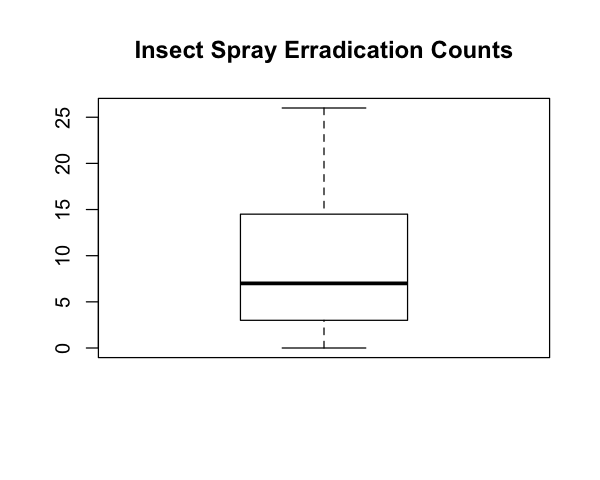

In [19]:
bp <- boxplot(InsectSprays$count, main="Insect Spray Erradication Counts")

One of the first things to notice is that I assigned the result
of the invocation to a variable `bp`.  This is not often done;
I only do it here to help with the discussion.

In [20]:
bp$stats[1:5]

[1]  0.0  3.0  7.0 14.5 26.0

The middle number, 7, represents the median of the erradication counts.
This is different from the average.  We've seen the formula for the
average.  The median, loosely speaking, is the value of the element in
the middle after sorting the values.  Of course, there can only be one
"element in the middle"
if there is an odd number of elements.  If there is an even number,
there are two such elements.  In this case, the median is the average
of the two elements in the middle.

**Note:** I've noticed the definition of *median* is not consistent
from one place to the next.  We're working with the definition that
R uses.  Things get more complicated (more options) with quartiles
and other quantiles.

The bold line in the boxplot presents the median.

The *boxplot* gets its name from the box inside it.  The lower and
upper bounds of this box correspond to the .25 and .75 quantiles
respectively.  That is, 25% of the data points lie below the lower
border of the box; 75% lie below the upper border of the box.  The
region between the lower and upper border is called the
**interquartile range**.

Let's run these numbers through the **quantile** function to see how
they align with the numbers from `bp$stats`.

In [21]:
quantile(InsectSprays$count, c(1,2,3)/4)

25%   50%   75% 
 3.00  7.00 14.25

It's a little different.

| Quantile | `boxplot` | `quantile` |
|----------|-----------|------------|
| 25%   | 3     | 3     |
| 50%   | 7     | 7     |
| 75%   | 14.50 | 14.25 |

This is nothing to be alarmed about.  Just slightly different ways of
thinking about quantiles.  These differences get smaller with larger
volumes of data.

Finally, in the boxplot above, we have the *wiskers*.  These are
short horizontal lines near the top and bottom of the figure extended
by dashes away from the box.  The upper wisker is computed in the
following way.

1. multiple the interquartile range by 1.5,
2. add it to the top of the box,
3. find the closest data point *below* this.

The lower wisker is similar - subtract 1.5 times the interquartile
range from the bottom of the box and choose the closest value *above* it.
Let's verify these values manually ourselves.

In [22]:
interQuartileRange <- bp$stats[4] - bp$stats[2]
maxTopWisker       <- bp$stats[4] + 1.5 * interQuartileRange
minBottomWisker    <- bp$stats[2] - 1.5 * interQuartileRange
c(minBottomWisker, maxTopWisker)
c(min(InsectSprays$count), max(InsectSprays$count))

[1] -14.25  31.75

[1]  0 26

In this case, the "min/max wisker range" is greater than the min/max
of the data.  So in this case, the wiskers take the min/max of the data.
In cases where the data is more spread apart, some data points will
extend past the wiskers.  In that case, they'll be plotted so you can
see them.

## Boxplots and Factors

A single boxplot for a single set of values is fine for a quick look
at a distribution.  But in published reports they are usually employed
to compare data with different factor values.  In this scenario the
`boxplot` function is usually invoked with its formula interface.  For
**boxplot formulas** we have

 * __LHS__ - the numeric values to be boxed
 * __RHS__ - the factors on which to split the boxes
 
 In the case of the `InsectSprays` dataset, instead of considering
 all counts together, we can split the counts on the brand of spray.

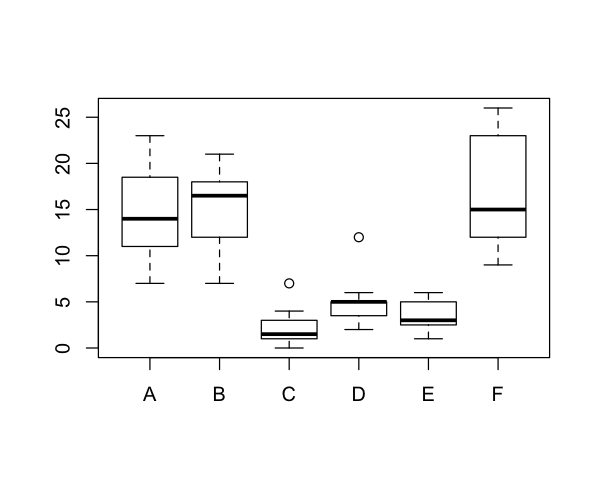

In [23]:
boxplot(count ~ spray, data=InsectSprays)

**Exercises**

1. Add the `col` parameter to provide color.
2. Add more color by making the value of the `col` parameter a vector of colors.
3. Add a title using the `main` parameter.
4. Use `xlab` and `ylab` to add axis labels.
5. After the `boxplot` command, draw a mean line: `abline(h=mean(InsectSprays$counts))`.

## Histograms

One of the most common single variable plot types is the histogram.
In the first workshop we used the `hist` function to compare how well
a distribution sampling function compared to the density of the
distribution itself (we did it for the binomial distribution).

The `hist` function is really good at giving us a quick and dirty
look at how values are distributed.  Let's revisit our `trees` dataset
that started single variable investigations.  The quick and dirty
histogram is

```
hist(trees$Volume)
```

But we change a few things.  The most common thing to adjust is the
`breaks` parameter.

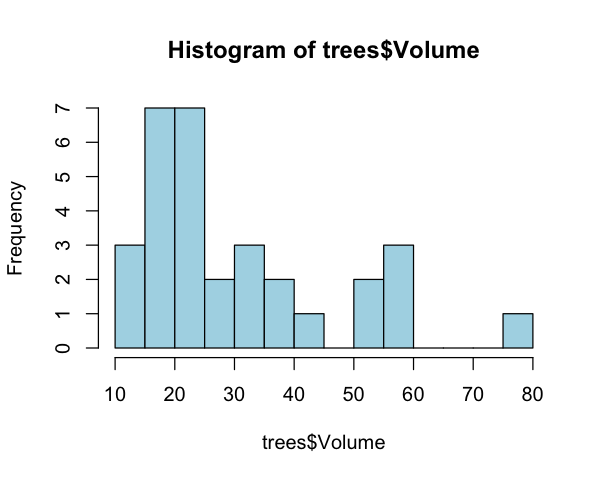

In [24]:
hist(trees$Volume, breaks=20, col='lightblue')

By default, the x-axis has the range of values.
But you might want to specify it explicitly if you are comparing
to other graphs.

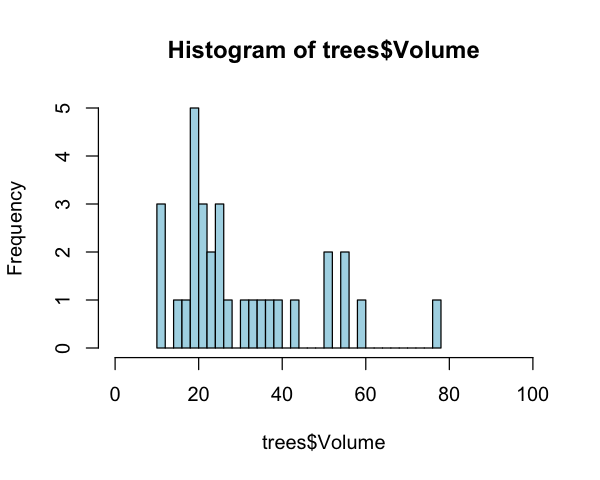

In [25]:
hist(trees$Volume, breaks=30, col='lightblue', xlim=c(0, 100))

Exercise:
* Customize the x and y labels with the `xlab` and `ylab` methods.

# Math

## Continuous Distributions

The last couple of workshops introduced some discrete random variables
such as the bernoulli and the binomial.  The range of values taken by
these random variables were non-negative integer counts.  A
*continuous random variable* has a range that varies continuously.
Example of continuous random variables in practice are time intervals
or averages of a collection of counts.

Most concepts of continuous distributions are similar to discrete
distributions.  But they are different enough to be treated separately
in most proofs in Probability and Statistics theory.

Cumulative distribution functions (CDFs) are defined the same way for
a continuous random variable X.

$$
F_X(x) = P[X \le x]
$$

This makes as much sense for continuous random variables as it does
for discrete.  Discrete random variables have the notion of a
*probability mass function* that take probability values at each
point.  Continuous random variables have a slightly different notion.
They define a *probability density function* as the derivative of the
continuous CDF.

$$
f_X(x) = \frac{dF_X(x)}{dx}
$$

This leads to an integral relationship that replaces the summation
relationship of discrete random variables for $P[a \lt X \le b]$.

$$
\begin{align}
\mbox{discrete:} \; &F_X(b) - F_X(a) = \sum_{a \lt i \le b} f_X(i) \\
\mbox{continuous:} \; &F_X(b) - F_X(a) = \int_b^a \frac{dF_X}{dt}(t) dt = \int_b^a f_X(t) dt
\end{align}
$$

In the discrete case, $f_X(i) = P[X = i]$.  The value of a
discrete probability mass function represents the probability of
the random variable taking that value.  No such interpretation
exists for the continuous case.  Rather, we only speak of intervals
in the continuous case.  The probability of a random variable taking
any exact value in the continous case is zero if the CDF is continuous.

Moment generating functions are defined in a similar way.

$$
m_X(t) = E[e^{xt}] = \int e^{xt}f_X(x) dx
$$

------------------------
End of R Workshop 3